In [ ]:
# Relatório de dados fornecidos pela Bemol, Questão 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [189]:
df = pd.read_csv('Desafio - Time de Projetos e Dados - Dados - Questão 1 (1).csv')
df.head()

,num_compra,usuario,nome,Tipo de Mercadoria,Filial,data_compra,valor_compra,Imposto,CPF NA NOTA?,Produto Devolvido,Motivo Devolução
0,24937847,295,ANDERSON,SPLIT 8501 À 10000,Loja Autazes,06/04/2020 12:25:13,"R$2,582.40",R$116.21,Sim,Não,NaN
1,23600787,331,RAIMUNDO,SPLIT INV 8501À10000,Loja Manicor é,06/04/2020 14:03:55,"R$1,919.28",R$86.37,Sim,Sim,Antecipação de troca
2,24298956,370,ROSILANE,SPLIT ACIMA DE 30000,Loja Manicor é,06/04/2020 14:35:14,"R$10,121.04",R$455.45,Sim,Sim,Insatisfação com o produto
3,23802765,460,SANDRA,SPLIT 10001 À 18000,Loja Manicor é,06/04/2020 14:59:20,"R$11,724.00",R$527.58,Sim,Sim,Problema na Entrega
4,22559356,538,JAMERSON,SPLIT 18001 À 30000,Loja Manicor é,06/04/2020 15:32:44,"R$1,157.28",R$52.08,Sim,Sim,Antecipação de troca


In [7]:
#indica os tipos de mercadoria
df.dtypes

num_compra             int64
usuario                int64
nome                  object
Tipo de Mercadoria    object
Filial                object
data_compra           object
valor_compra          object
Imposto               object
CPF NA NOTA?          object
Produto Devolvido     object
Motivo Devolução      object
dtype: object

In [17]:
#indica o número de vezes que cada mercadoria aparece(Produtos mais vendidos)
df['Tipo de Mercadoria'].value_counts()

SPLIT 10001 À 18000    103
SPLIT 18001 À 30000    103
GRILL                   25
TV LED DE 21" À 24"     25
TV LED DE 32"           25
                      ... 
ESFOLIANTE              11
ABSORVENTE P/SEIOS      11
DUCHA GINECOLÓGICA      11
GEL ANTISSÉPTICO        11
CREME DE MASSAGEM       11
Name: Tipo de Mercadoria, Length: 857, dtype: int64

In [327]:
#indica as 5 mercadorias mais vendidas
df['Tipo de Mercadoria'].head(5)

0      SPLIT 8501 À 10000
1    SPLIT INV 8501À10000
2    SPLIT ACIMA DE 30000
3     SPLIT 10001 À 18000
4     SPLIT 18001 À 30000
Name: Tipo de Mercadoria, dtype: object

<AxesSubplot:title={'center':'PRODUTOS MAIS VENDIDOS'}, xlabel='Números de vendas', ylabel='Produtos'>

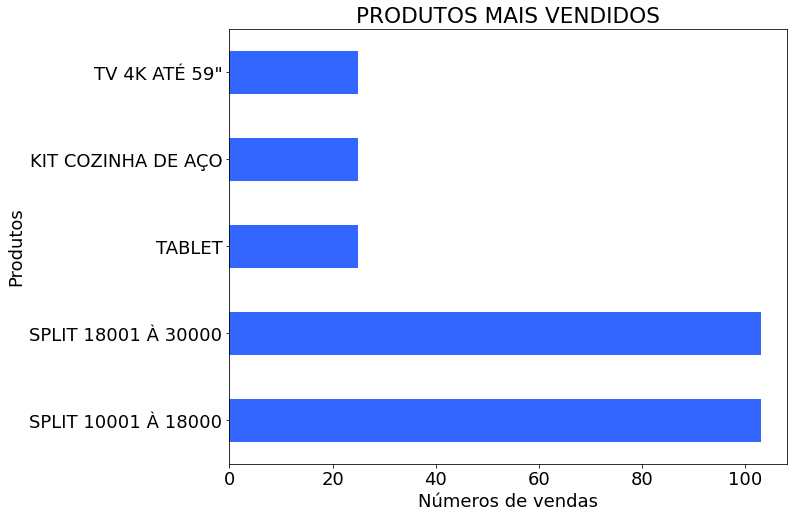

In [325]:
#informa os 5 produtos mais vendidos
plt.figure(figsize = (10, 8))
plt.xlabel('Números de vendas')
plt.ylabel('Produtos')
df['Tipo de Mercadoria'].value_counts().head(5).plot.barh(title = 'PRODUTOS MAIS VENDIDOS',color = '#3366FF')


In [46]:
#implica a soma dos  elementos
CPFtotal = df['CPF NA NOTA?'].count()
lista_CPF = df['CPF NA NOTA?']
print(lista_CPF)

0        Sim
1        Sim
2        Sim
3        Sim
4        Sim
        ... 
13872    Sim
13873    Sim
13874    Sim
13875    Sim
13876    Sim
Name: CPF NA NOTA?, Length: 13877, dtype: object


In [51]:
#informar a quantidade de 'Sims' e 'NAOS'
lista_CPF.value_counts()

Sim     11908
Na~o     1969
Name: CPF NA NOTA?, dtype: int64

In [54]:
# Quantidades de sims
def contaCPF_Sim(target,lista):
    count_Sim = 0
    
    for palavra in lista:
        if (palavra == target):
            count_Sim += 1
    return count_Sim
quantidadeSim = contaCPF_Sim('Sim',lista_CPF)
print('QuantidadeSim: ',quantidadeSim)

QuantidadeSim:  11908


In [58]:
#quantidade de nãos
def contaCPF_nao(target,lista):
    count_Nao = 0
    for palavra in lista:
        if (palavra == target):
            count_Nao += 1
    return count_Nao
quantidadeNao = contaCPF_nao('Na~o',lista_CPF)
print('QuantidadeNao: ', quantidadeNao)

QuantidadeNao:  1969


In [63]:
# porcentagens de sim ou nao
pctSim = (quantidadeSim/(CPFtotal)) * 100
print(round(pctSim,2))
pctNao = (quantidadeNao / (CPFtotal)) * 100
print(round(pctNao,2))

85.81
14.19


<Figure size 720x576 with 0 Axes>

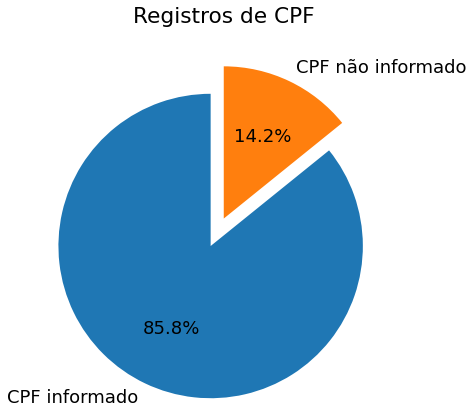

In [322]:
# gráfico da porcentagem de CPF que foram registrados
plt.figure(figsize = (10, 8))
rotulo = ('CPF informado', 'CPF não informado')
valorCPF = (pctSim,pctNao)
explode = (0.2,0)
plt.figure(figsize =(7,7))
plt.pie(x = valorCPF, labels = rotulo, explode = explode, autopct = '%1.1f%%', startangle = 90)
plt.title("Registros de CPF")
plt.show()

In [142]:
df_imposto = df['Imposto'].value_counts()
print(df_imposto)

Series([], Name: Imposto, dtype: int64)


In [204]:
# converter os objetos em float
def converteValor(lista):
    i = 0
    lista = []
    while (i < len(df['valor_compra'])):
           lista.append(df['valor_compra'][i].replace('R$','').replace(',',''))
           i += 1
    return lista
df_valor_compra = pd.to_numeric(converteValor(df['valor_compra']))
df_valor_compra.dtype

dtype('float64')

In [231]:
# converter os objetos em float
def converteImposto(lista):
    i = 0
    lista = []
    while (i < len(df['Imposto'])):
           lista.append(df['Imposto'][i].replace('R$','').replace(',',''))
           i += 1
    return lista
df_Imposto = pd.to_numeric(converteImposto(df['Imposto']))
df_Imposto.dtype

dtype('float64')

In [234]:
# cálculo da porcentagem
def porcentagem(imposto,valor,posicao):
    porcent = (imposto[posicao] / valor[posicao]) * 100
            
    return porcent

# calcula a porcentagem de um valor a partir de uma posição aleatória, ex.5
Taxa_Imposto = porcentagem(df_Imposto,df_valor_compra,5)
print(f'O imposto em cima do produto em questão é {round(Taxa_Imposto,2)}%')


O imposto em cima do produto em questão é 4.5%


In [238]:
# Quantidades de devolvidos

def contaDev_Sim(target,lista):
    count_Sim = 0
    
    for palavra in lista:
        if (palavra == target):
            count_Sim += 1
    return count_Sim
quantidadeDevolvidosSim = contaDev_Sim('Sim',df['Produto Devolvido'])
print('QuantidadeSim: ',quantidadeDevolvidosSim)

QuantidadeSim:  6915


In [253]:
# Porcentagem de devolvidos
Devolvidos_total = df['Produto Devolvido'].count()
print(Devolvidos_total)
porcent_Devolvidos = (quantidadeDevolvidosSim/Devolvidos_total ) * 100
print(round(porcent_Devolvidos,2))

13877
49.83


<Figure size 720x576 with 0 Axes>

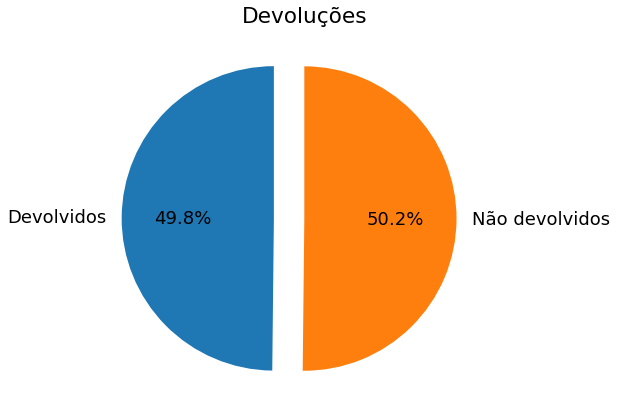

In [323]:
# Porcentagem não devolvidos
porcent_NDevolvidos = ((Devolvidos_total - quantidadeDevolvidosSim)/Devolvidos_total) * 100
# gráfico da porcentagem de devoluções que foram registrados
plt.figure(figsize = (10, 8))

rotulo = ('Devolvidos', 'Não devolvidos')
valorDevolvido = (porcent_Devolvidos,porcent_NDevolvidos)
explode = (0.2,0)

plt.figure(figsize =(7,7))
plt.pie(x = valorDevolvido, labels = rotulo, explode = explode, autopct = '%1.1f%%', startangle = 90)
plt.title("Devoluções")
plt.show()

In [272]:
# Valor total dos motivos das devoluções
df['Motivo Devolução'].value_counts()

Defeito do produto                1439
Insatisfação com o produto        1385
Problema na Entrega               1369
Antecipação de troca              1368
Insatisfação com o atendimento    1354
Name: Motivo Devolução, dtype: int64

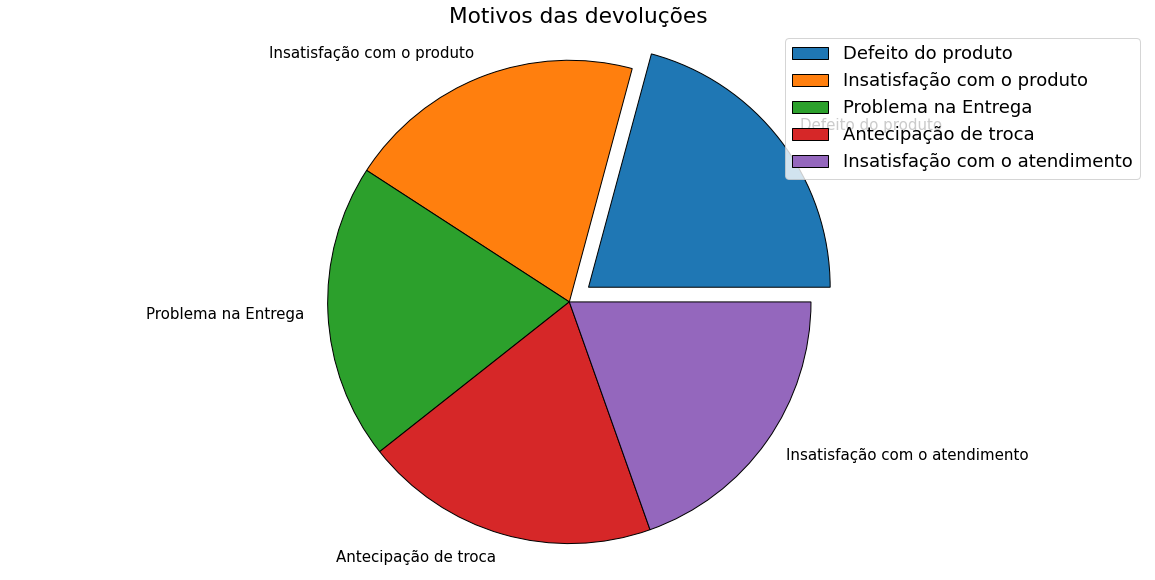

In [303]:
# Motivo das devoluções dos clientes
count = df["Motivo Devolução"].value_counts().values
dev = df["Motivo Devolução"].value_counts().index
plt.figure(figsize = (45, 10))

plt.xlabel("Motivo")
plt.title("Motivos de Devolução")
plt.subplot(1, 2, 2)
plt.pie(count, 
        labels = list(dev),  
        
        labeldistance = 1.1,
        explode = [.1, 0, 0, 0,0],
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 15}, 
        )
plt.axis("equal")
plt.title("Motivos das devoluções")
plt.legend()